# Import Dataframes

In [11]:
# import data from "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/" (umsatz_gekuerzt.csv, kiwo.csv, wetter.csv) and save as .csv
import pandas as pd

# import data
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
df_umsatz = pd.read_csv(url + "umsatzdaten_gekuerzt.csv")
df_kiwo = pd.read_csv(url + "kiwo.csv")
df_wetter = pd.read_csv(url + "wetter.csv")

# save data as .csv
df_umsatz.to_csv("df_umsatz.csv", index=False)
df_kiwo.to_csv("df_kiwo.csv", index=False)
df_wetter.to_csv("df_wetter.csv", index=False)

# Dataframes mergen

In [12]:
import pandas as pd

# Mergen: Umsatzdaten mit Kieler Woche (Left Join)
merged_df = df_umsatz.merge(df_kiwo, on='Datum', how='left')

# Mergen: Das Ergebnis mit Wetterdaten (Left Join)
merged_df = merged_df.merge(df_wetter, on='Datum', how='left')

# Ergebnis anzeigen
print(merged_df.head())

# Anzeigen der Spaltennamen (Variablen) im gemergten DataFrame
print(merged_df.columns)

# save the merged df as df_merged_umsatz_kiwo_wetter
merged_df.to_csv("df_merged_umsatz_kiwo_wetter.csv", index=False)



        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  
Index(['Datum', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Bewoelkung',
       'Temperatur', 'Windgeschwindigkeit', 'Wettercode'],
      dtype='object')


# Statistiken zur Kieler Woche

In [13]:
# Filtere die Daten, bei denen 'KielerWoche' == 1
kiwo_only = merged_df[merged_df['KielerWoche'] == 1]

# Entferne Duplikate in der 'Datum'-Spalte, um sicherzustellen, dass jedes Datum nur einmal gezählt wird
unique_kiwo_dates = kiwo_only['Datum'].drop_duplicates()

# Zähle die eindeutigen Tage der Kieler Woche
kiwo_count = unique_kiwo_dates.count()

# Ausgabe
print(f"Die Kieler Woche hat an insgesamt {kiwo_count} verschiedenen Tagen stattgefunden.")

Die Kieler Woche hat an insgesamt 45 verschiedenen Tagen stattgefunden.


Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche:
Warengruppe
1    136.044535
2    538.577783
3    223.323531
4     81.158180
5    315.718687
Name: Umsatz, dtype: float64


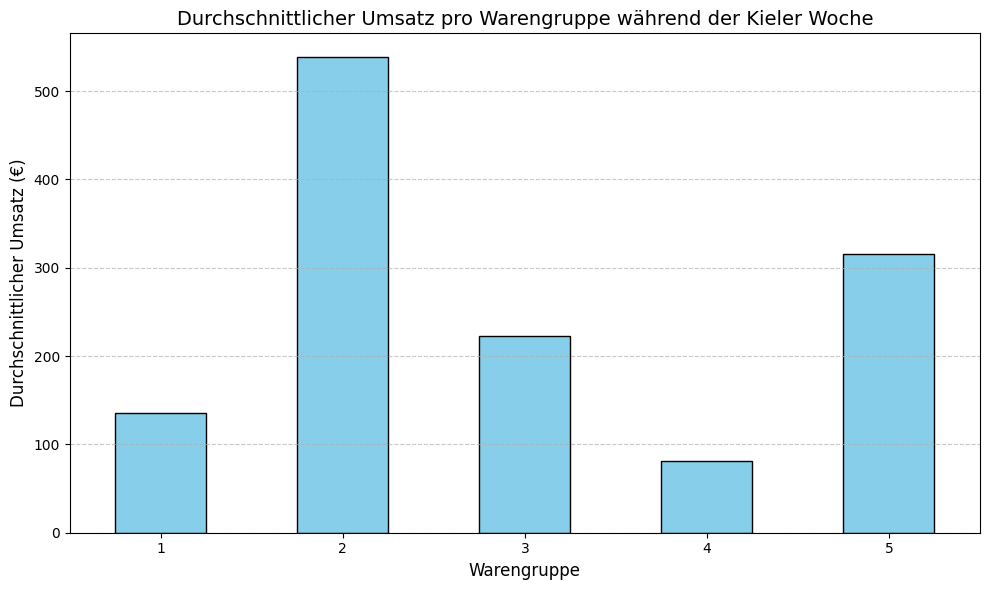

In [14]:
# Filtere die Daten für die Kieler Woche
umsatz_kiwo = merged_df[merged_df['KielerWoche'] == 1]

# Berechne den durchschnittlichen Umsatz pro Warengruppe
durchschnitt_umsatz_pro_warengruppe = umsatz_kiwo.groupby('Warengruppe')['Umsatz'].mean()

print("Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche:")
print(durchschnitt_umsatz_pro_warengruppe)

import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
durchschnitt_umsatz_pro_warengruppe.plot(kind='bar', color='skyblue', edgecolor='black')

# Diagramm anpassen
plt.title('Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche', fontsize=14)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xlabel('Warengruppe', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


Deskriptive Statistiken und Visualisierungen zu den Umsatzdaten

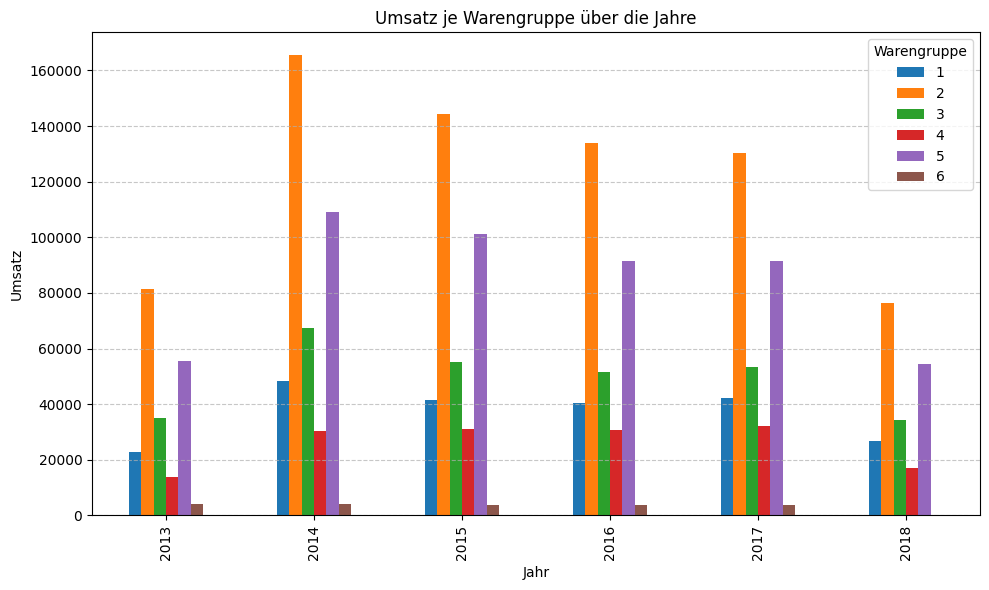

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden (korrigierter Pfad)
datei_pfad = 'df_umsatz.csv'  # Datei befindet sich im selben Arbeitsverzeichnis
daten = pd.read_csv(datei_pfad)

# Datum in Datumsformat umwandeln und Jahr extrahieren
daten['Datum'] = pd.to_datetime(daten['Datum'])
daten['Jahr'] = daten['Datum'].dt.year

# Umsatz je Jahr und Warengruppe summieren
umsatz_aggregiert = daten.groupby(['Jahr', 'Warengruppe'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle für Diagrammdarstellung erstellen
umsatz_pivot = umsatz_aggregiert.pivot(index='Jahr', columns='Warengruppe', values='Umsatz')

# Diagramm erstellen
umsatz_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Umsatz je Warengruppe über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Umsatz')
plt.legend(title='Warengruppe')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()



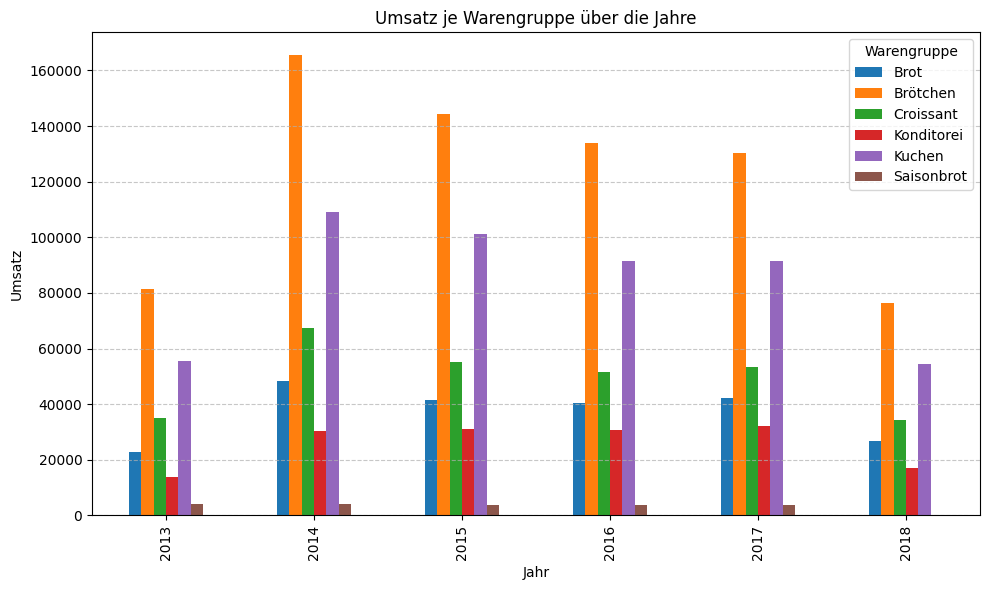

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden (korrigierter Pfad)
datei_pfad = 'df_umsatz.csv'  # Datei befindet sich im selben Arbeitsverzeichnis
daten = pd.read_csv(datei_pfad)

# Warengruppen-Umbenennung
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen-ID in lesbare Namen umbenennen
daten['Warengruppe'] = daten['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr extrahieren
daten['Datum'] = pd.to_datetime(daten['Datum'])
daten['Jahr'] = daten['Datum'].dt.year

# Umsatz je Jahr und Warengruppe summieren
umsatz_aggregiert = daten.groupby(['Jahr', 'Warengruppe'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle für Diagrammdarstellung erstellen
umsatz_pivot = umsatz_aggregiert.pivot(index='Jahr', columns='Warengruppe', values='Umsatz')

# Diagramm erstellen
umsatz_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Umsatz je Warengruppe über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Umsatz')
plt.legend(title='Warengruppe')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


Monatlicher Umsatz für die Warengruppe 6 (Saisonbrot) von 2013 - 2018

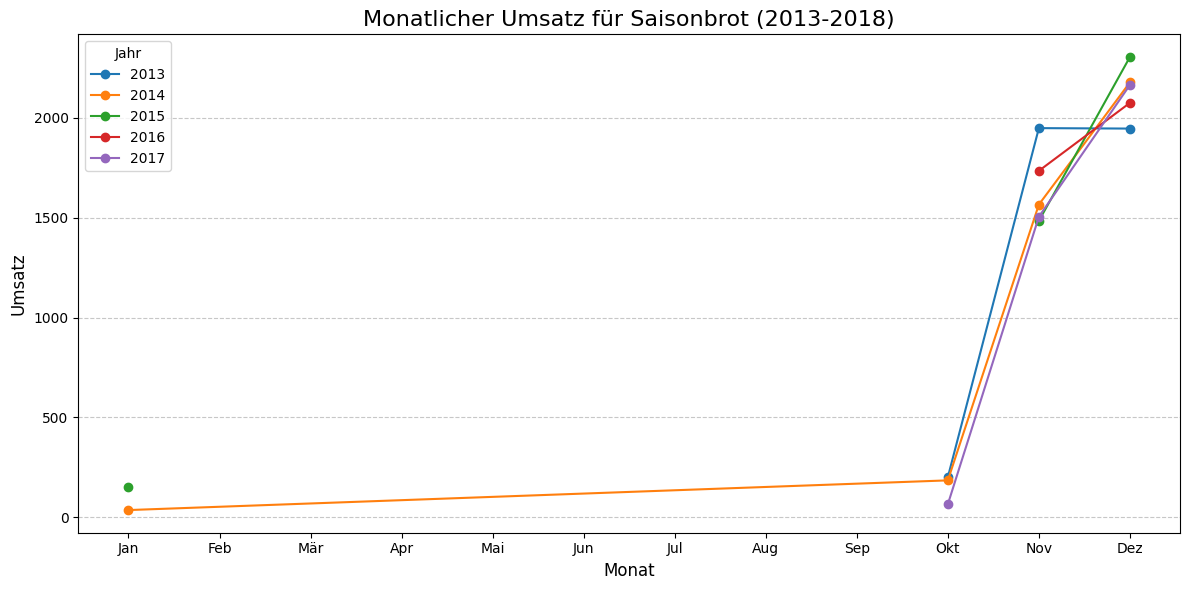

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Kuchen',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Saisonbrot" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Saisonbrot') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Saisonbrot (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()



Monatlicher Umsatz für die Warengruppe 5 (Kuchen) von 2013 - 2018

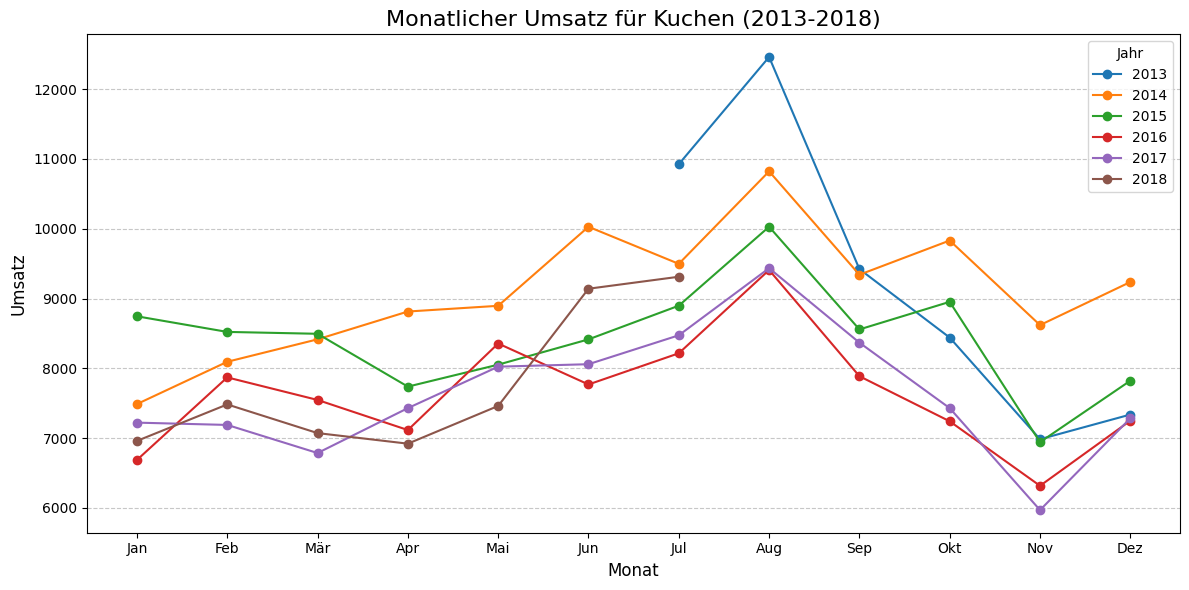

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Kuchen" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Kuchen') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Kuchen (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()



Monatlicher Umsatz für die Warengruppe 4 (Konditorei) von 2013 - 2018

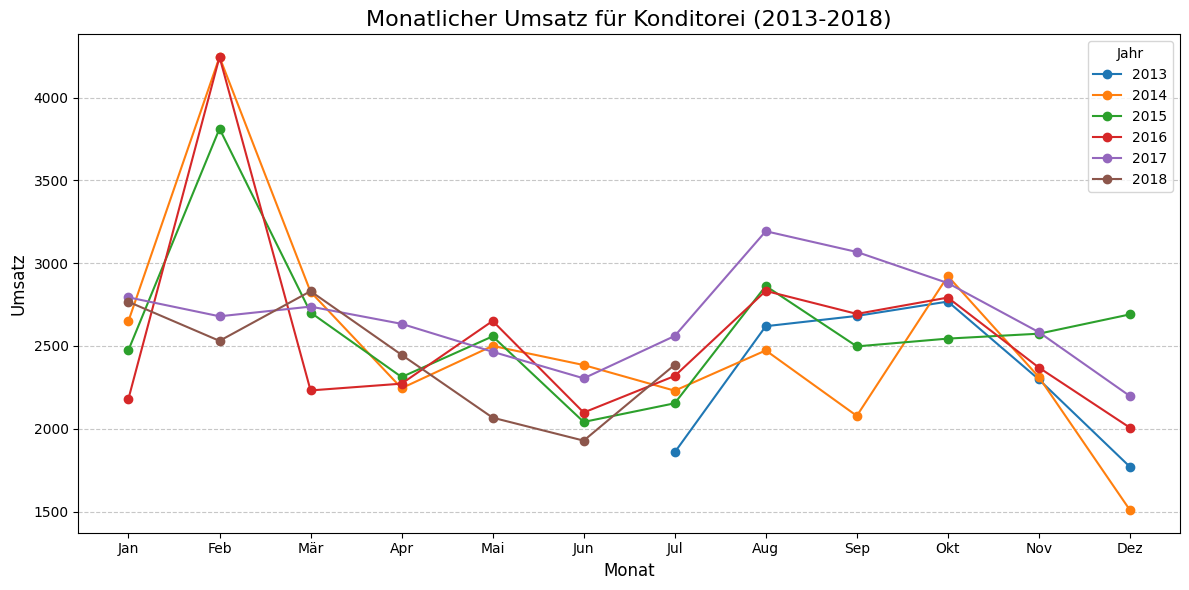

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Konditorei" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Konditorei') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Konditorei (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

Monatlicher Umsatz für die Warengruppe 3 (Croissant) von 2013 - 2018

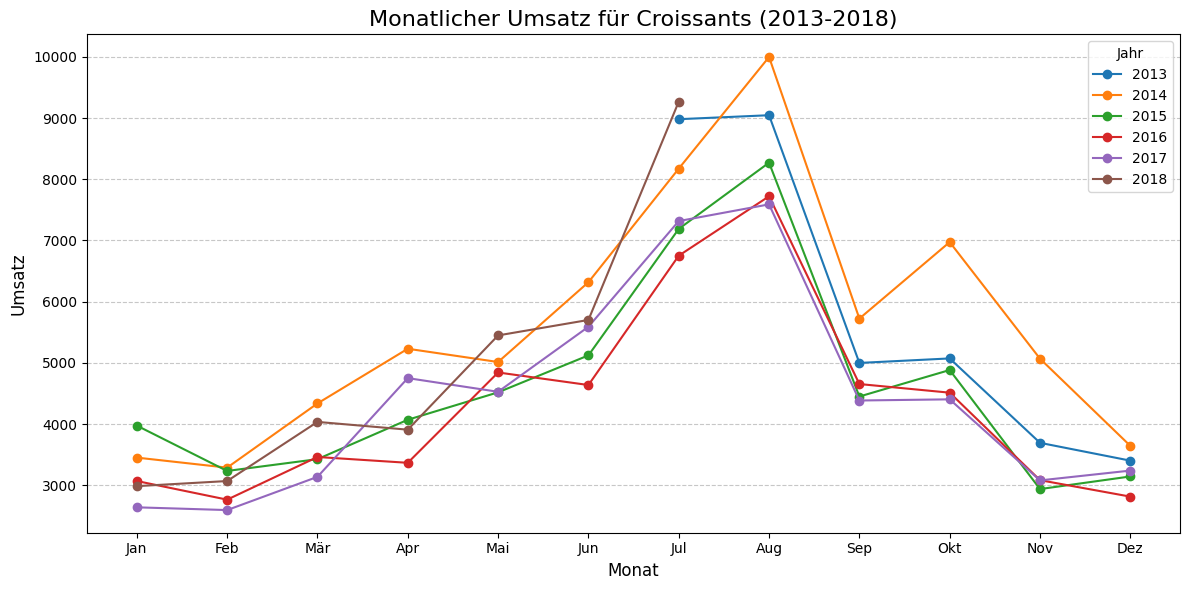

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Croissant" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Croissant') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Croissants (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

Monatlicher Umsatz für die Warengruppe 2 (Brötchen) von 2013 - 2018

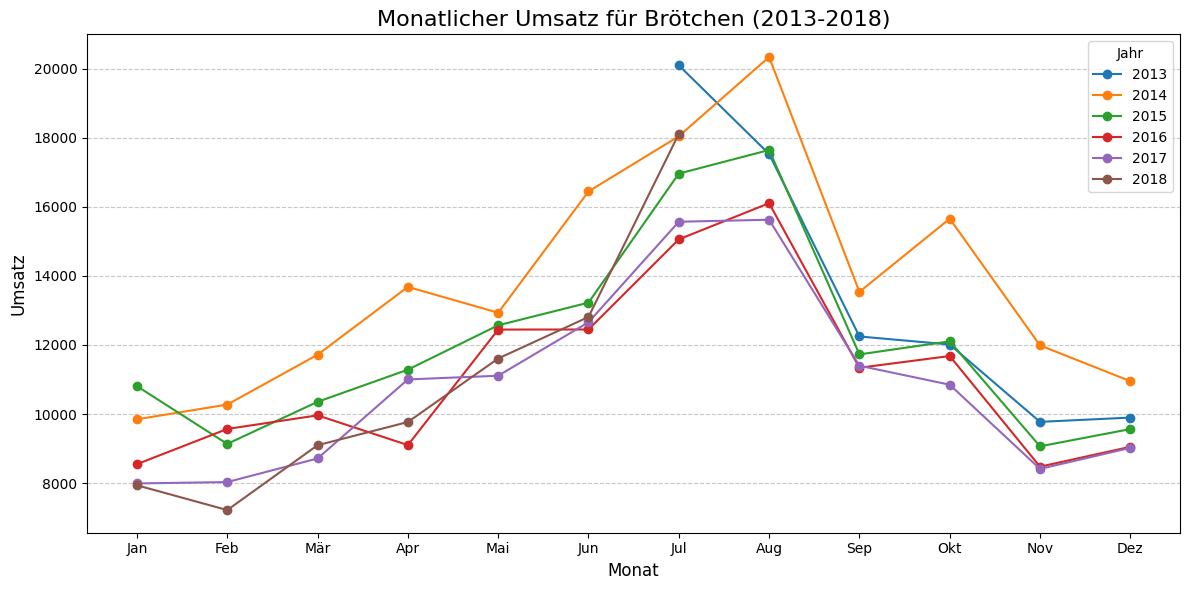

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Brötchen" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Brötchen') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Brötchen (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

Monatlicher Umsatz für die Warengruppe 1 (Brot) von 2013 - 2018

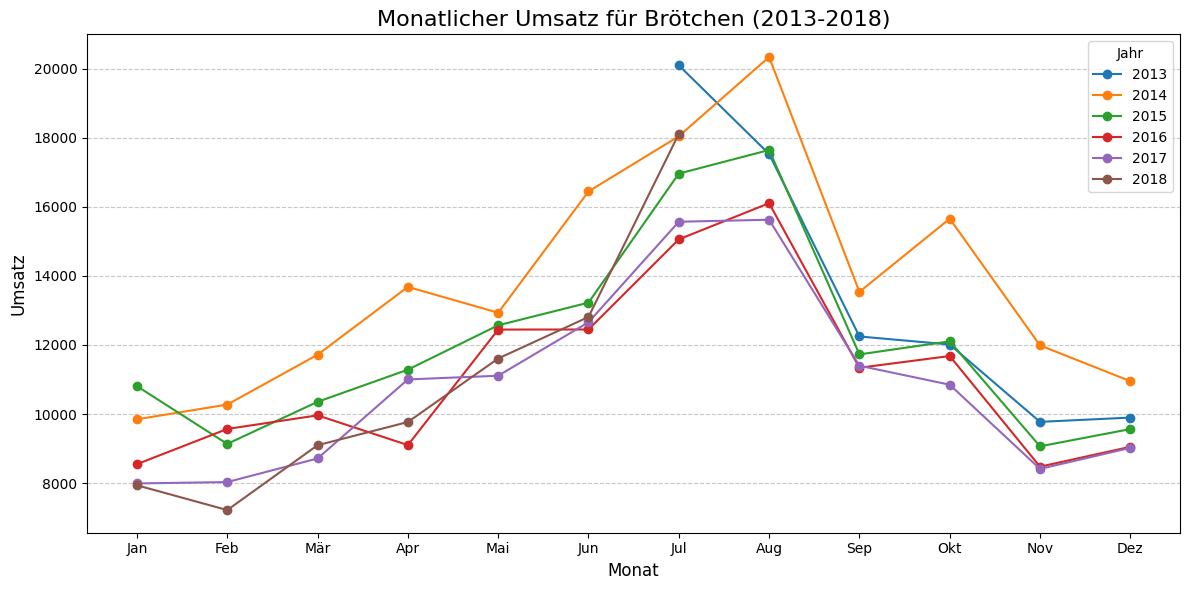

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Brötchen" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Brötchen') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Brötchen (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()